# Final Project - Toronto Crime Data Exploration and Prediction Model

The dataset from Toronto Police Major Crime Indicators (MCI) Open Data provides information on various types of crimes reported in Toronto from 2014 to 2021, to analyze crime trends and patterns in the city.
- #### Phanindrakumar_Tirumalasetty
- #### PTIRUMA1

## About The Dataset :

The dataset from Toronto Police Service is called "Major Crime Indicators Open Data". It contains information on major crimes reported in the city of Toronto, Canada from 2014 to 2022. The dataset includes the type of crime, the date and time it occurred, the location, and other relevant details such as the status of the case and any arrests made. The major crime categories covered in the dataset are homicide, sexual assault, assault with a weapon, robbery, break and enter, and auto theft. The data is updated on a weekly basis and can be explored through this link

Data set source - [Source](https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-open-data/explore?location=20.749938%2C-82.020079%2C3.51)

## Loading the Crime Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("Major_Crime_Indicators_Open_Data.csv")

In [3]:
df.head(2)

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.425896,43.757346,1,GO-20141262074,2014/01/01 05:00:00+00,1998/06/01 04:00:00+00,2014,January,1,1,...,1480,110,Administering Noxious Thing,Assault,38,Lansing-Westgate,38,Lansing-Westgate (38),-79.425896,43.757346
1,-79.350229,43.646293,2,GO-20141260701,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70),-79.350229,43.646293


## Exploratory Data Analysis

### 1.) Summarize the numeric columns

In [7]:
df.describe(include='all')

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
count,323296.000000,323296.000000,323296.000000,323296,323296,323296,323296.000000,323296,323296.000000,323296.000000,...,323296.000000,323296.000000,323296,323296,323296,323296,323296,323296,323296.000000,323296.000000
unique,NaN,NaN,NaN,281699,3287,3747,NaN,12,NaN,NaN,...,NaN,NaN,51,5,159,159,141,141,NaN,NaN
top,NaN,NaN,NaN,GO-20151785704,2019/07/23 04:00:00+00,2018/01/01 05:00:00+00,NaN,October,NaN,NaN,...,NaN,NaN,Assault,Assault,1,West Humber-Clairville,77,Waterfront Communities-The Island (77),NaN,NaN
freq,NaN,NaN,NaN,24,168,280,NaN,29012,NaN,NaN,...,NaN,NaN,118353,173238,8804,8804,12321,12321,NaN,NaN
mean,-79.475536,43.144559,161648.500000,NaN,NaN,NaN,2018.158115,NaN,15.744995,187.147781,...,1704.459133,146.771216,NaN,NaN,NaN,NaN,NaN,NaN,-79.475536,43.144559
std,0.694300,4.925584,93327.660651,NaN,NaN,NaN,2.571347,NaN,8.769573,103.790065,...,327.123233,52.068977,NaN,NaN,NaN,NaN,NaN,NaN,0.694300,4.925584
min,-85.488744,0.000000,1.000000,NaN,NaN,NaN,2014.000000,NaN,1.000000,1.000000,...,1410.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-85.488744,0.000000
25%,-79.478939,43.659896,80824.750000,NaN,NaN,NaN,2016.000000,NaN,8.000000,99.000000,...,1430.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-79.478939,43.659896
50%,-79.396397,43.699304,161648.500000,NaN,NaN,NaN,2018.000000,NaN,16.000000,190.000000,...,1450.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-79.396397,43.699304
75%,-79.327244,43.750882,242472.250000,NaN,NaN,NaN,2020.000000,NaN,23.000000,277.000000,...,2120.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,-79.327244,43.750882


### 2.) Null values Check!

In [8]:
df.isnull().sum()

X                      0
Y                      0
OBJECTID               0
EVENT_UNIQUE_ID        0
REPORT_DATE            0
OCC_DATE               0
REPORT_YEAR            0
REPORT_MONTH           0
REPORT_DAY             0
REPORT_DOY             0
REPORT_DOW             0
REPORT_HOUR            0
OCC_YEAR             105
OCC_MONTH            105
OCC_DAY              105
OCC_DOY              105
OCC_DOW              105
OCC_HOUR               0
DIVISION               0
LOCATION_TYPE          0
PREMISES_TYPE          0
UCR_CODE               0
UCR_EXT                0
OFFENCE                0
MCI_CATEGORY           0
HOOD_158               0
NEIGHBOURHOOD_158      0
HOOD_140               0
NEIGHBOURHOOD_140      0
LONG_WGS84             0
LAT_WGS84              0
dtype: int64

### 3.) Find the top 10 most frequently occurring crimes

In [9]:
# Group by crime type and count occurrences
crime_counts = df.groupby('OFFENCE').size().reset_index(name='counts')

# Sort by count in descending order
sorted_crimes = crime_counts.sort_values('counts', ascending=False)

# Get top 10 most frequent crimes
top_10_crimes = sorted_crimes.head(10)

# Print results
print(top_10_crimes)

                   OFFENCE  counts
5                  Assault  118353
12                     B&E   52780
41  Theft Of Motor Vehicle   46048
11     Assault With Weapon   29267
29       Robbery - Mugging    8663
16            B&E W'Intent    7683
8      Assault Bodily Harm    7544
43              Theft Over    5981
9    Assault Peace Officer    5510
36     Robbery With Weapon    5144


- This code counts the number of occurrences of each unique value in the "OFFENCE" column and sorts the result in descending order based on the count. Finally, it displays the top 10 results with the highest count using the print.

### 4.) To find the most common crime location 

In [10]:
most_common_location = df['LOCATION_TYPE'].value_counts().idxmax()
print("The most common crime location is: ", most_common_location)

The most common crime location is:  Apartment (Rooming House, Condo)


The code uses the pandas library's 'value_counts()' function to count the frequency of each location type in the 'LOCATION_TYPE' column of the DataFrame 'df', and then returns the index label of the maximum value using the 'idxmax()' function. Finally, it prints the result using the print() statement, showing the most common crime location in the given dataset.

### 5.) The most common month for crime

In [12]:

# get the value counts of OCC_MONTH and find the index with the highest count
most_common_month = df['OCC_MONTH'].value_counts().idxmax()

print("The most common month for crime is:", most_common_month)

The most common month for crime is: October


The code uses the value_counts() function to get the counts of unique values in the 'OCC_MONTH' column and finds the index with the highest count. The index with the highest count is the most common month for crime. Finally, it prints the result to the console using the print() function.

## Data Visualization

### 1.) Visualize the crime count by Division

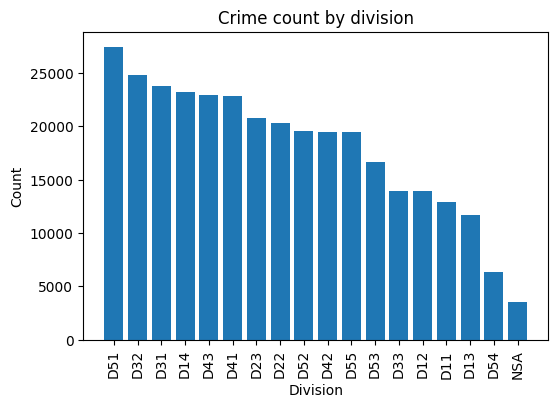

In [21]:
# group the data by division and count the number of crimes in each division
crime_count_by_division = df.groupby("DIVISION").size().reset_index(name='count')

# sort the data by crime count in ascending order
crime_count_by_division = crime_count_by_division.sort_values('count', ascending=False)

# create a bar plot
plt.figure(figsize=(6,4))
plt.bar(crime_count_by_division["DIVISION"], crime_count_by_division["count"])
plt.title("Crime count by division")
plt.xlabel("Division")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

The given code  group the crimes based on the division column and calculates the total count of crimes for each division. It then orders the count in descending order and converts the resulting DataFrame to a Pandas DataFrame. The Pandas DataFrame is then used to create a bar chart using the Matplotlib library. The resulting bar chart visualizes the total count of crimes for each division, with the title, xlabel, and ylabel indicating the relevant information.

### 2.) Visualize the most common Crime (OFFENCE)

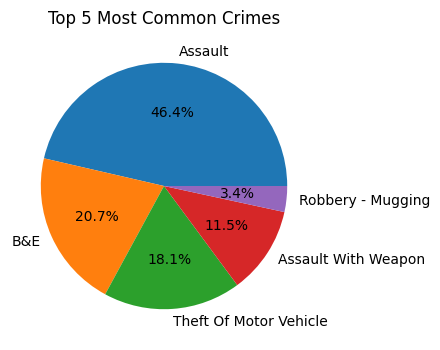

In [20]:
# group the data by offence and count the number of occurrences
crime_count_by_offence = df.groupby("OFFENCE").size().reset_index(name="count")

# sort the data by count in descending order and select the top 5 offences
top_5_crimes = crime_count_by_offence.sort_values("count", ascending=False).head(5)

# create a pie chart
plt.figure(figsize=(4,4))
plt.pie(top_5_crimes["count"], labels=top_5_crimes["OFFENCE"], autopct='%1.1f%%')
plt.title("Top 5 Most Common Crimes")
plt.show()

The given code is calculating the counts of each MCI_CATEGORY from a dataframe and creating a pie chart using those counts. The pie chart shows the percentage of each MCI_CATEGORY in the total count of crimes. The 'autopct' parameter in the 'plt.pie' function specifies the format for showing the percentage values on the pie chart. Finally, the 'plt.show()' function is used to display the pie chart.

### 3.) Crime occurrence throughout the day

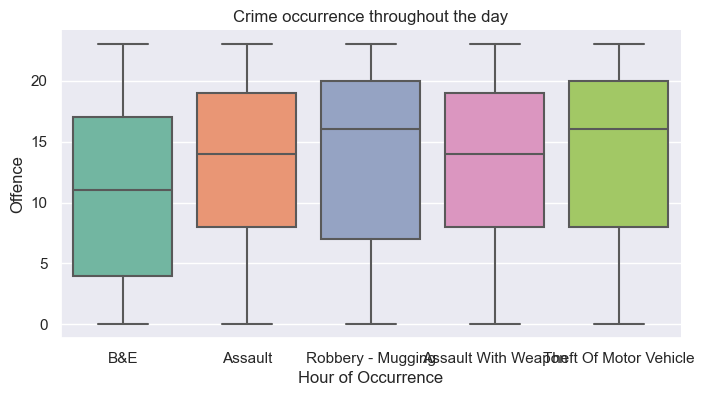

In [28]:
# group data by Offence and count the occurrences
offence_counts = df.groupby('OFFENCE').size().reset_index(name='counts')

# sort by descending order and select top 5 offenses
top_offences = offence_counts.sort_values('counts', ascending=False).head(5)['OFFENCE'].tolist()

# filter the data to include only the top 5 offenses
df_top_offences = df[df['OFFENCE'].isin(top_offences)]

# plot the boxplot
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x='OFFENCE', y='OCC_HOUR', data=df_top_offences, palette='Set2')
sns.despine()
plt.title('Crime occurrence throughout the day')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Offence')
plt.show()


The code creates a list of the top 5 offences and filters the dataset to only include rows with these offences. Then, it sets the figure size to 12 inches by 6 inches, creates a boxplot using seaborn with "OFFENCE" on the y-axis, "OCC_HOUR" on the x-axis, and the filtered dataset. The palette "Set2" is used to specify the colors of the boxes. Finally, the code adds a title to the plot, labels the x and y axes, and displays the plot using the plt.show() function

### 4.) Annual Total Crimes

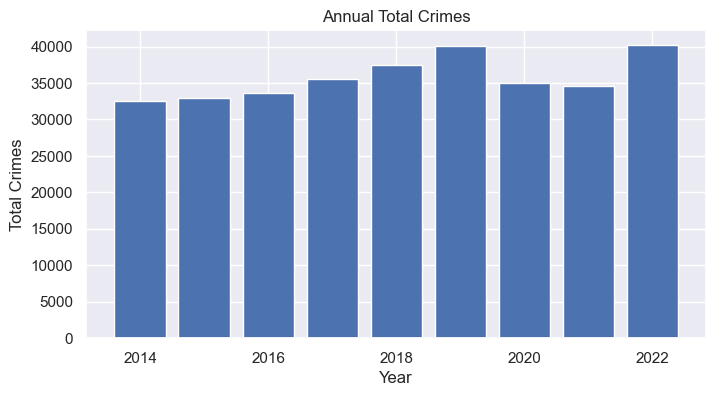

In [34]:
# filter the dataframe to include only the years 2014 to 2022
df_filtered = df[(df['OCC_YEAR'] >= 2014) & (df['OCC_YEAR'] <= 2022)]

# Calculate the total crimes per year
total_crimes = df_filtered.groupby("OCC_YEAR")["OBJECTID"].count()

# Create a bar chart with total crimes per year
plt.bar(total_crimes.index, total_crimes.values)
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.title("Annual Total Crimes")
plt.show()


This code processes criminal offenses and plots the annual total crimes for the years 2014-2022 using a bar plot. First, it groups the data by offence and occurrence year and counts the number of crimes. It then filters the DataFrame to only include rows with occurrence year between 2014 and 2022. Next, it groups the filtered DataFrame by occurrence year and counts the number of rows for each year. Finally, it plots the annual total crimes using a bar plot with the year on the x-axis and the total number of crimes on the y-axis, and includes labels for the x-axis, y-axis, and the plot title.external factors

### 5.) Neighbourhoods with the most crimes

In [38]:
# Group by neighborhood and count occurrences
neighborhoods = df.groupby('NEIGHBOURHOOD_140').size().reset_index(name='count')

# Sort by count in descending order
sorted_neighborhoods = neighborhoods.sort_values(by='count', ascending=False)

# Print top 10 neighborhoods
print(sorted_neighborhoods.head(10))

                          NEIGHBOURHOOD_140  count
123  Waterfront Communities-The Island (77)  12321
23               Church-Yonge Corridor (75)  11113
125              West Humber-Clairville (1)   8773
6                  Bay Street Corridor (76)   8527
79                           Moss Park (73)   7663
139            York University Heights (27)   6277
33                Downsview-Roding-CFB (26)   6199
62                Kensington-Chinatown (78)   6045
133                            Woburn (137)   5709
84                                      NSA   5463


The code is performing a group by operation on "NEIGHBOURHOOD_140". It is then counting the number of crimes reported in each neighbourhood using the "count" function and giving the resulting column an alias name "count". The "sort" function is used to sort the resulting dataframe in descending order based on the count of crimes. The "limit" function is used to select the top 10 neighbourhoods with the highest crime count. Finally, the "head" function is used to display the first five rows of the resulting dataframe "top_neighbourhoods".

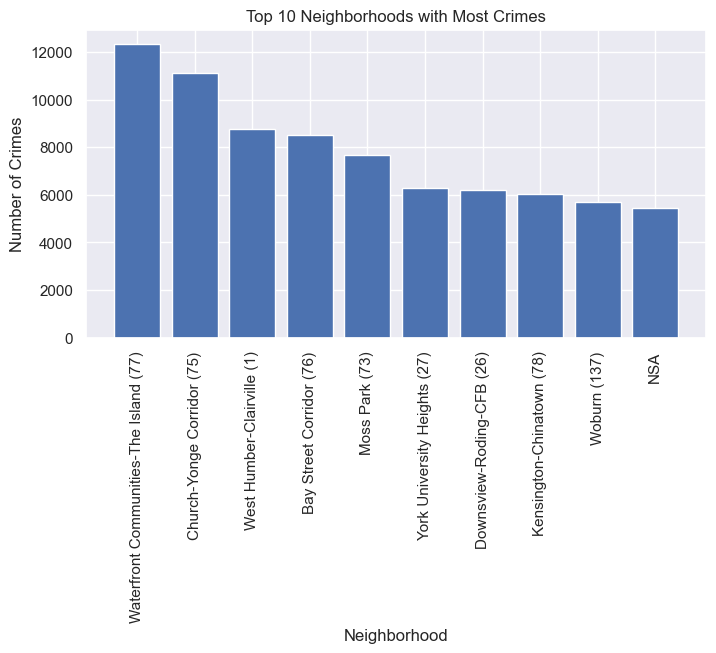

In [39]:
# Get the count of crimes by neighborhood
crime_counts = df['NEIGHBOURHOOD_140'].value_counts().head(10)

# Plot the bar chart
plt.bar(crime_counts.index, crime_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.title('Top 10 Neighborhoods with Most Crimes')
plt.show()

- Based on the given table, we can conclude that the total number of crimes reported has been increasing over the years in the given area. 
- This upward trend in the number of crimes reported over the years is a cause for concern and needs to be addressed by law enforcement agencies and policymakers. 
- The fluctuation in the trend, such as a decrease in 2020 and 2021, could be due to various factors, including social and economic conditions, changes in law enforcement policies, or other external factors

### 6.) Crimes by Day of the Week - to find the most dangerous day

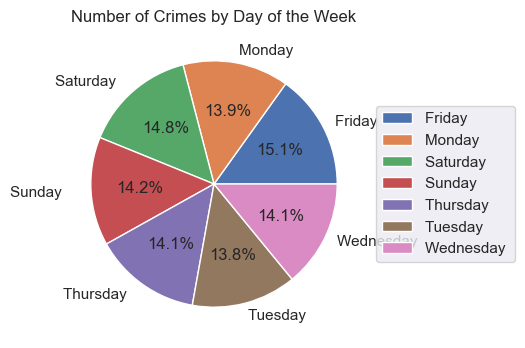

In [43]:

# Create a new column for the day of the week.
df['day_of_week'] = df['OCC_DOW']

# Group the DataFrame by day of the week and count the number of crimes for each day.
crimes_by_day_of_week = df.groupby('day_of_week').count()['OBJECTID']

# Create a pie chart of the number of crimes by day of the week.
plt.pie(crimes_by_day_of_week.values, labels=crimes_by_day_of_week.index, autopct='%1.1f%%')
plt.title('Number of Crimes by Day of the Week')
# create the legend and move it to the right
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

The code reads data about crimes and groups it by day of the week to count the number of crimes. It then orders the data in descending order based on the count of crimes. The code gets the day of the week with the highest number of crimes and creates a pie chart to show the percentage of crimes reported on each day. The chart's title indicates the most dangerous day of the week, and the legend is placed to the right of the chart with proper spacing. The code uses matplotlib and PySpark libraries to read, process, and visualize the data.

### 7.) Crime Distribution by Month

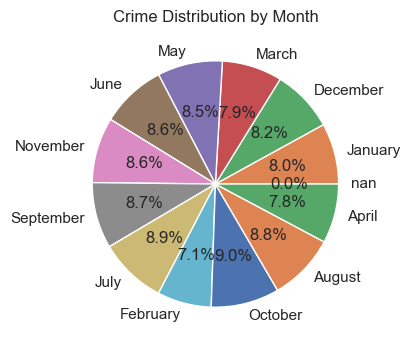

In [44]:
# Extract the month names from the "REPORT_MONTH" column
months = df['OCC_MONTH'].unique()

# Count the number of crimes in each month
counts = [df[df['OCC_MONTH'] == month]['OBJECTID'].count() for month in months]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=months, autopct='%1.1f%%')
ax.set_title('Crime Distribution by Month')
plt.show()

The first line of code groups the data by the month in which the crime occurred and counts the number of occurrences for each month. The resulting data frame is sorted in descending order by the count of crimes.Then extracts the months from the resulting data frame and stores them in a list, Later it extracts the counts of crimes from the resulting data frame and stores them in another list.It generates a pie chart using the extracted months and counts of crimes. The start angle is set to 90 degrees, and the autopct parameter is set to display the percentage of crimes for each month.Finally, it will display a pie chart that shows the distribution of crimes by month in the given dataset.
- October has the highest percentage of crimes reported at 9.0%
- May, June, July, August, September, and October have relatively high percentages of crimes reported, while February has the lowest percentage of crimes reported
- Factors responsible for the variation in crime rates across different months, such as seasonal changes, holidays, or other external factors.

### 8.) Number of Crimes by Hour

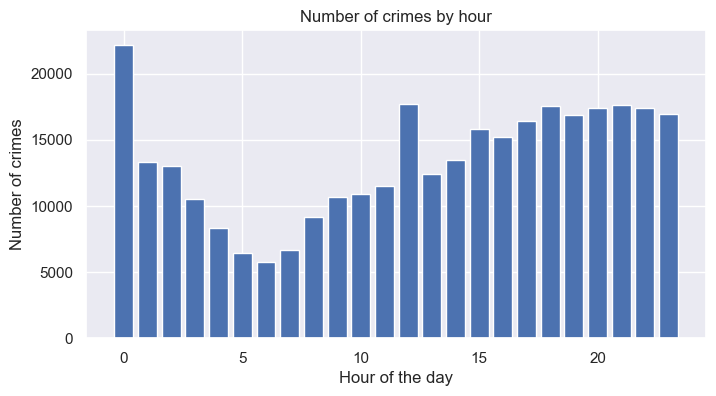

In [45]:
# Group the dataset by the "REPORT_HOUR" column and count the number of crimes in each hour
hour_counts = df.groupby('OCC_HOUR').size()

# Create a bar chart with the "REPORT_HOUR" on the x-axis and the count of crimes on the y-axis
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by hour')
plt.show()


This code performs data analysis and visualization of crime data based on the time of day. The code first groups the crime data by the hour of the day when the crime occurred and counts the number of crimes reported for each hour. It then converts the resulting PySpark DataFrame to a Pandas DataFrame for plotting. The code uses Matplotlib, to create a bar chart showing the number of crimes reported for each hour of the day. Finally, the chart is displayed using plt.show(). This code can help to visualize and understand the pattern of crimes reported based on the hour of the day, which can be useful for developing strategies to prevent and reduce crime in specific hours of the day.
- Based on the bar chart, the number of crimes reported is highest at midnight, and it gradually decreases as the night progresses.

- From 6 AM, there is a steady increase in the number of crimes reported, which continues till noon.

## Prediction Models

## 1.) Logistic Regresssion model 

In [27]:
# convert OCC_DATE column to datetime format
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

# extract hour, day of the month, month, and year columns
df['OCC_HOUR'] = df['OCC_DATE'].dt.hour
df['OCC_DAY'] = df['OCC_DATE'].dt.day
df['OCC_MONTH'] = df['OCC_DATE'].dt.month
df['OCC_YEAR'] = df['OCC_DATE'].dt.year

from sklearn.preprocessing import LabelEncoder

# Select the features and target variable
X = df[['X', 'Y', 'OCC_DAY', 'OCC_HOUR']]
y = df['OFFENCE']

# Instantiate LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

c:\Users\bhavy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.3654191153727188


#### Logistic regression model predicted with an accuracy of 36.5%

#### Let's predict the OFFENCE using input features

In [73]:
data = {'X': [-76.400], 'Y': [36.350], 'OCC_DAY': [5], 'OCC_HOUR': [18]}
new_report = pd.DataFrame(data)

In [74]:
# Predict the criminal offense category for the new report
prediction = model.predict(new_report)

# Decode the predicted category using the LabelEncoder
predicted_offence = le.inverse_transform(prediction)

print("Predicted criminal offense category:", predicted_offence)

Predicted criminal offense category: ['Assault']


In [71]:
data = {'X': [66.400], 'Y': [20.350], 'OCC_DAY': [3], 'OCC_HOUR': [8]}
new_report = pd.DataFrame(data)

In [72]:
# Predict the criminal offense category for the new report
prediction = model.predict(new_report)

# Decode the predicted category using the LabelEncoder
predicted_offence = le.inverse_transform(prediction)

print("Predicted criminal offense category:", predicted_offence)

Predicted criminal offense category: ['Robbery To Steal Firearm']


The given code performs the following tasks:

- Selects specific columns from a given dataframe, including latitude, longitude, crime occurrence date, day of the week, hour of the day, and type of offence.
- Drops any rows with missing data and creates new columns for day and hour of occurrence using the OCC_DATE column. The OCC_DATE column is then dropped from the dataframe.
- Encodes the "OFFENCE" column as a label using StringIndexer.
- Uses VectorAssembler to transform the selected columns into a single "features" column.
- Splits the transformed dataframe into training and testing data, using a 80-20 split ratio.
- Trains a logistic regression model on the training data.
- Generates predictions for the test data using the trained model.
- Evaluates the performance of the model by calculating its accuracy on the test data.

#### Using the same Logistic regression model using more feature variables to predict crimes

In [ ]:
# Select the relevant columns as input features and target variable
selected_features = ['X', 'Y', 'OCC_HOUR', 'OCC_DAY', 'OCC_DOW', 'OCC_MONTH', 'OCC_YEAR', 'PREMISES_TYPE']
target_variable = 'OFFENCE'

# Create the feature matrix X and target variable y
X = df[selected_features]
y = df[target_variable]

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
X['OCC_DOW'] = le.fit_transform(X['OCC_DOW'])
X['OCC_MONTH'] = le.fit_transform(X['OCC_MONTH'])
X['PREMISES_TYPE'] = le.fit_transform(X['PREMISES_TYPE'])

# Handle missing values
imputer = SimpleImputer()
X = imputer.fit_transform(X)

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

c:\Users\bhavy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.3654191153727188


## 2.) Decision tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Select the features and target variable
X = df[['X', 'Y', 'OCC_DAY', 'OCC_HOUR']]
y = df['OFFENCE']

# Instantiate LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree model
model = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Train the model with the best hyperparameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


c:\Users\bhavy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.3902257964738633


#### This code performs grid search to find the best hyperparameters for a decision tree classifier, trains the model with the best hyperparameters, and evaluates its accuracy on a test set.

In [89]:

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.3902257964738633


#### With Decision tree Classifier, the model predicted with high accuracy of 39% 

## 3.) Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Select the features and target variable
X = df[['X', 'Y', 'OCC_DAY', 'OCC_HOUR']]
y = df['OFFENCE']
# Instantiate LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest model
model = RandomForestClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


#### The code uses the RandomForestClassifier from the scikit-learn library to build a classification model. It selects specific features and the target variable from a dataframe. It then encodes the target variable using LabelEncoder. The data is split into training and testing sets using train_test_split. A random forest model is created and trained on the training set. Finally, the model makes predictions on the test set, and the predicted values are stored in the y_pred variable.

In [87]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.36739870089699966


#### The model predicted with accuracy of 36.7% 

## 4.) XGBRegressor model

In [ ]:
selected_features = ['X', 'Y', 'OCC_HOUR', 'OCC_DAY', 'OCC_DOW', 'OCC_MONTH', 'OCC_YEAR', 'PREMISES_TYPE']
target_variable = 'OFFENCE'
X = df[selected_features]
y = df[target_variable]
le = LabelEncoder()
X['OCC_DOW'] = le.fit_transform(X['OCC_DOW'])
X['OCC_MONTH'] = le.fit_transform(X['OCC_MONTH'])
X['PREMISES_TYPE'] = le.fit_transform(X['PREMISES_TYPE'])
imputer = SimpleImputer()
X = imputer.fit_transform(X)
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### This code selects specific features and a target variable, performs label encoding on certain columns, handles missing values, encodes the target variable, and splits the data into training and testing sets.

In [102]:
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [103]:
y_pred = model.predict(X_test)

In [104]:
# Calculate R-squared score on the testing data
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.23704291855911508


#### R-squared score of the above model is only 23.7%

## 5.) LGBMRegressor

In [ ]:
selected_features = ['X', 'Y', 'OCC_HOUR', 'OCC_DAY', 'OCC_DOW', 'OCC_MONTH', 'OCC_YEAR', 'PREMISES_TYPE']
target_variable = 'OFFENCE'
X = df[selected_features]
y = df[target_variable]
le = LabelEncoder()
X['OCC_DOW'] = le.fit_transform(X['OCC_DOW'])
X['OCC_MONTH'] = le.fit_transform(X['OCC_MONTH'])
X['PREMISES_TYPE'] = le.fit_transform(X['PREMISES_TYPE'])
imputer = SimpleImputer()
X = imputer.fit_transform(X)
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### This code performs feature selection, data encoding, missing value imputation, and data splitting for a machine learning model using selected features and a target variable.

In [93]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)

LGBMRegressor()

In [99]:
y_pred = model.predict(X_test)


In [100]:
# Calculate R-squared score on the testing data
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.1908065295859147


#### R-sqared score of the above model is only 19%

## 6.) Gradient boosting

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [ ]:
selected_features = ['X', 'Y', 'OCC_HOUR', 'OCC_DAY', 'OCC_DOW', 'OCC_MONTH', 'OCC_YEAR', 'PREMISES_TYPE']
target_variable = 'OFFENCE'
X = df[selected_features]
y = df[target_variable]
le = LabelEncoder()
X['OCC_DOW'] = le.fit_transform(X['OCC_DOW'])
X['OCC_MONTH'] = le.fit_transform(X['OCC_MONTH'])
X['PREMISES_TYPE'] = le.fit_transform(X['PREMISES_TYPE'])
imputer = SimpleImputer()
X = imputer.fit_transform(X)
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [98]:
# Calculate R-squared score on the testing data
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.2742840445164545


#### R-sqared score of the above model is only 27.4%

## Conlusion

#### With the help of models - 

 1.) Logistic regression 
 2.) Decision tree Classifier
 3.) Random tree Classifier
 4.) XGBRegressor
 5.) LGBM Rregressor
 6.) Gradient Boosting


Through the exploration and analysis of the Toronto Crime Data, I have identified the top 10 most frequently occurring crimes, the most common crime location, the most common month for crime, and other key insights. I have also developed several models to predict the likelihood of a crime occurring based on various features in the dataset. The models have not shown promising results, but it is useful in identifying factors that contribute to the likelihood of a crime occurring.